In [25]:
import numpy as np
import matplotlib.pyplot as plt
from spec_id import Gen_spec, Median_w_Error_cont,Median_w_Error, Gen_spec
import seaborn as sea
import pandas as pd
from glob import glob
from astropy.io import fits
from astropy.table import Table
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)
%matplotlib inline

In [20]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126 and ids != 48631')
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

WFC3/IR coverage : 136" X 123"

Area: 16728 arcsec$^2$

$dV_c = D_H \frac{(1+z)^2 D^2_A}{E(z)} d\Omega \: dz$

$D_H = \frac{c}{H_0} $

$H_0 = 100 \; h  \; km \; s^{-1} Mpc^{-1} $

$D_A = \frac{D_M}{1+z} $

$E(z) = \sqrt{\Omega_M (1+z)^3 + \Omega_k (1+z)^2 + \Omega_\Lambda}$

$D_M = D_C$

$D_C = D_H \int_0^z \frac{dz'}{E(z')}$

$\Omega_M = 0.3$

$\Omega_\Lambda = 0.7$

$h = 0.7$

$radians = 206265"$

$side A = 6.59 X 10^{-4} \: rad$

$side A = 5.96 X 10^{-4} \: rad$

Total solid angle = $3.928 X 10^{-7} \: sterad$

In [1]:
136*123

16728

In [7]:
136 / 206265.

0.0006593459869585242

In [8]:
6.59E-4 * 5.96E-4

3.92764e-07

In [14]:
def D_H(h):
    return 3E5 /(100*h)

def E_z(Om,Ok,Ol,z):
    return np.sqrt(Om*(1+z)**3 + Ok*(1+z)**2 + Ol)

def D_c(Om,Ok,Ol,z,h):
    z_range = np.linspace(0,z,100)
    
    x = np.zeros(100)
    for i in range(len(x)):
        x[i] = E_z(Om,Ok,Ol,z_range[i])
    
    return D_H(h)*np.trapz(x, z_range)

def D_A(Om,Ok,Ol,z,h):
    return D_c(Om,Ok,Ol,z,h) / (1+z)

def V_c(Om,Ok,Ol,z,h,sA):
    #sA = solid angle
    z_range = np.linspace(0,z,100)
    
    x = np.zeros(100)
    for i in range(len(x)):
        x[i] = ((1+z_range[i])**2 * D_A(Om,Ok,Ol,z_range[i],h)**2) / E_z(Om,Ok,Ol,z_range[i])

    return D_H(h) * sA * np.trapz(x,z_range)

In [24]:
25 / (12 * (V_c(0.3,0,0.7,1.8,0.7,3.928E-7) - V_c(0.3,0,0.7,1,0.7,3.928E-7)))

3.9601205344756907e-05

In [23]:
galDB[galDB.lmass >= 10.6]

,gids,ids,ra,dec,hi_res_specz,lmass,tau,Z_f,Z_-_sig_f,Z_+_sig_f,...,t_+_sig_cal,tx_cal,tx_-_sig_cal,tx_+_sig_cal,Zx_cal,Zx_-_sig_cal,Zx_+_sig_cal,Z_cal,Z_-_sig_cal,Z_+_sig_cal
49,n16758,16758,189.162357,62.224840,1.014,10.83,0.00,0.020,0.001,0.002,...,0.666,3.916834,0.716433,0.749499,0.013952,0.001852,0.002693,0.014,0.002,0.003
50,n17070,17070,189.268086,62.226445,1.192,10.92,8.48,0.011,0.003,0.004,...,0.516,2.043086,0.518036,0.573146,0.011427,0.002918,0.006565,0.012,0.003,0.006
61,n21156,21156,189.239409,62.247548,1.251,11.16,8.30,0.020,0.005,0.004,...,0.307,2.098196,0.418838,0.308617,0.023884,0.003928,0.003984,0.024,0.004,0.004
62,n21427,21427,189.368121,62.247344,1.514,10.73,8.48,0.019,0.010,0.007,...,0.514,2.329659,0.584168,0.584168,0.017543,0.008810,0.008529,0.018,0.009,0.008
86,n32566,32566,189.161280,62.307577,1.150,10.61,8.70,0.020,0.008,0.006,...,0.395,2.032064,0.683367,0.462926,0.021190,0.008136,0.006004,0.022,0.009,0.005
96,n34694,34694,189.147840,62.323647,1.145,10.94,8.30,0.015,0.006,0.005,...,0.963,2.803607,0.462926,0.958918,0.014345,0.004882,0.005667,0.015,0.006,0.005
107,n37686,37686,189.274474,62.360820,1.258,10.89,8.48,0.016,0.003,0.004,...,0.751,3.068136,0.473948,0.782565,0.014681,0.003928,0.005667,0.015,0.004,0.005
212,s35774,35774,53.158775,-27.742385,1.223,10.86,8.90,0.008,0.003,0.003,...,0.378,2.803607,0.859719,0.473948,0.008397,0.004433,0.009876,0.009,0.005,0.009
217,s38785,38785,53.168249,-27.727300,1.175,10.88,8.60,0.019,0.007,0.006,...,0.108,2.054108,0.242485,0.154309,0.026914,0.004377,0.002301,0.027,0.004,0.002
219,s39012,39012,53.064240,-27.727621,1.632,11.09,8.78,0.019,0.011,0.008,...,0.364,1.877756,0.374749,0.385772,0.021359,0.011222,0.006453,0.022,0.012,0.006


In [26]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')


In [27]:
galDB.ids[270]

48631

In [29]:
spec =  Gen_spec(galDB.gids[270],galDB.hi_res_specz[270])

No TEAL-based tasks available for this package!
../data/galaxy_flts/s48631_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s48631_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s48631_flt: photutils.source_properties - 2 objects
../data/galaxy_flts/s48631_flt: save ../data/galaxy_flts/s48631_flt.detect_seg.fits, ../data/galaxy_flts/s48631_flt.detect.cat


In [30]:
spec.Median_spec(galDB.Z_lwa[270],galDB.t_lwa[270],tau)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:496: RuntimeWarning: invalid value encountered in divide
  self.optimal_profile = m/m.sum(axis=0)


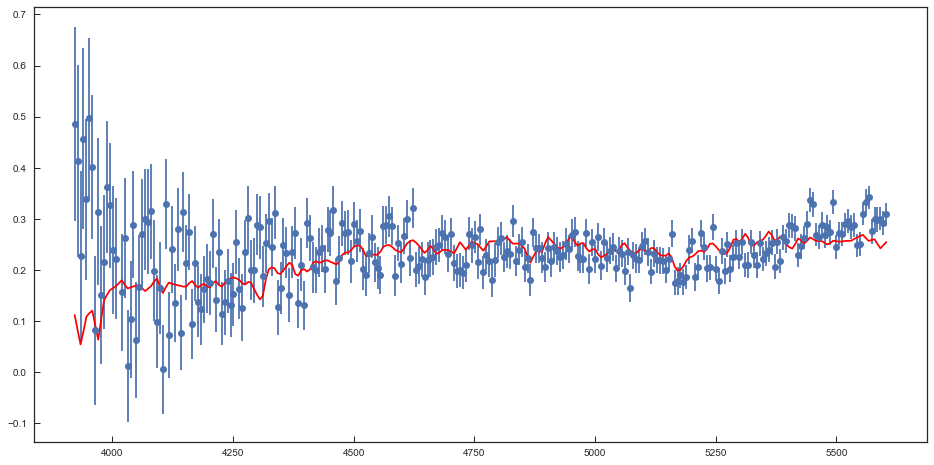

In [32]:
plt.figure(figsize=[16,8])
plt.errorbar(spec.gal_wv_rf, spec.gal_fl, spec.gal_er, fmt='o')
plt.plot(spec.gal_wv_rf, spec.fl,'r')

In [33]:
print galDB.Z_lwa[270]/0.019,galDB.t_lwa[270]

1.42105263158 4.7
